In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [3]:
hdf5_folder = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/N4Gpu/2pcNoAMR/Setonix/Data_for_Yifei/'
infile   = os.path.join(hdf5_folder, 'reduce_data_25Myr.h5')
hf = h5py.File(infile ,'r')

# Display keys

In [4]:
hf.keys()

<KeysViewHDF5 ['GasDensity', 'Metallicity', 'Temp', 'Timestep', 'X', 'Y', 'Z', 'ne']>

# Load GasDensity as numpy arr

In [8]:
gasDensity = np.array(hf.get("GasDensity")) 
gasDensity.shape

(512, 512, 1024)

# Load X, Z Coordinates

In [6]:
xcoord = np.array(hf.get("X")) 
zcoord = np.array(hf.get("Z")) 


# Plot a Slice

/jobfs/120021925.gadi-pbs/ipykernel_1757621/1166432336.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax.pcolormesh(xcoord/kpc,zcoord/kpc, np.transpose(gasDensity[:,plane,:]/mp),\


Text(0.5, 1.0, ' $\\rho$\n[g cm$^{-3}$]')

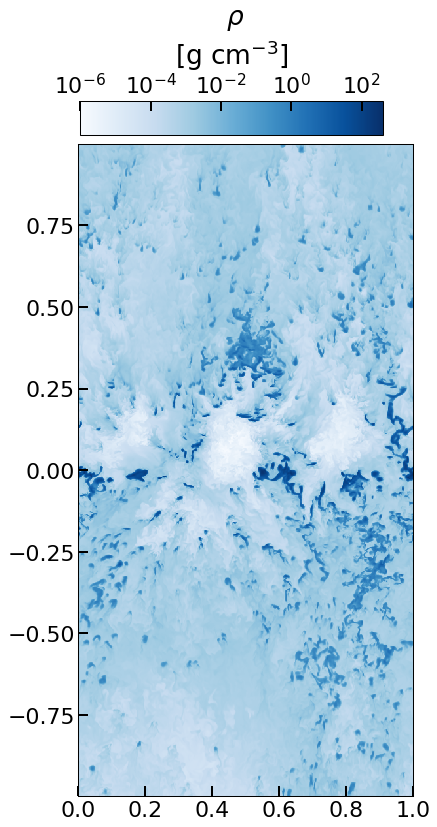

In [11]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(6, 12))
i=0

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.25
cbtitlex = 0.1
cbtitley = 16.5
plane = 256 #midplane 

plot = ax.pcolormesh(xcoord/kpc,zcoord/kpc, np.transpose(gasDensity[:,plane,:]/mp),\
                    norm=mcolors.LogNorm(vmin=1.e-6, vmax=4.e2),
                    cmap='Blues')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-6, 1.e-4, 1.e-2, 1., 1.e2))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\rho$" + "\n" + "[g cm$^{-3}$]")
